# Health Insurance Cost Prediction using Linear Regression

Importing the required libraries. Numpy and pandas are used to work with data set, seaborn and matplotlib are used to plot the data for visualization

In [12]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounting the drive to upload the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the dataset.

In [8]:
#loading the dataset
insurance = pd.read_csv('/content/drive/MyDrive/insurance.csv')

Head function is used to view the data

In [9]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Regression algorithms work on features represented as numbers only.
By looking at our dataset we see that columns — ‘sex’, ‘smoker’ and ‘region’ are in string format, so we can work on converting them to numerical values. 

In [10]:
# Replacing string values to numbers
insurance['sex'] = insurance['sex'].apply({'male':0,'female':1}.get) 
insurance['smoker'] = insurance['smoker'].apply({'yes':1, 'no':0}.get)
insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [11]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Using the pairplot function we create plots to understand our dataset better.

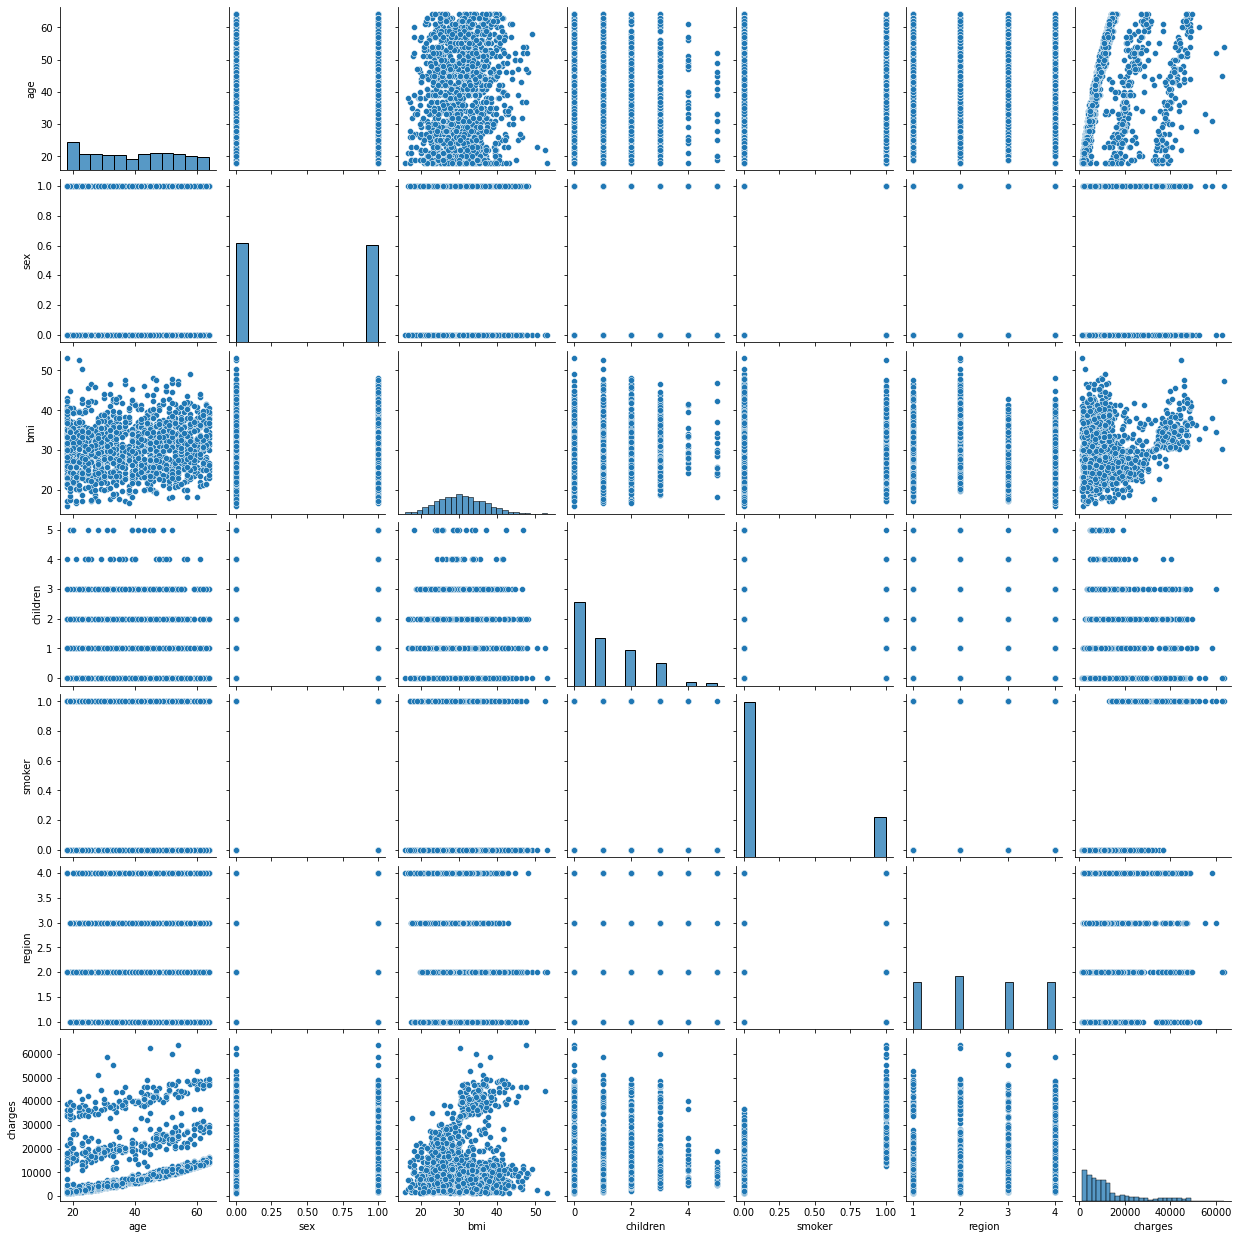

In [13]:
sns.pairplot(insurance)

Now we will split our data into ‘X’ array that contains the features and a ‘y’ array with the target variable.

In [14]:
#features
X = insurance[['age', 'sex', 'bmi', 'children','smoker','region']]

# predicted variable
y = insurance['charges']

In [15]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [16]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Next we will split our dataset(insurance.csv) into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [17]:
# importing train_test_split model
from sklearn.model_selection import train_test_split
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [19]:
len(X_test) # 402


536

In [20]:
len(X_train) # 936

802

In [21]:
len(insurance) # 1338

1338

we can evaluate the model using Linear regression as below:

In [23]:
# importing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit linear model by passing training dataset
model.fit(X_train,y_train)

Predicting the target variable for test datset

In [24]:

predictions = model.predict(X_test)

In [30]:
predictions[0:5]

array([ 8760.2096328 ,  6938.06189767, 36540.05433084,  9620.65909435,
       26846.54008858])

Comparing these ‘prediction’ results with actual results by plotting a graph.

Text(0, 0.5, 'Predicted Y')

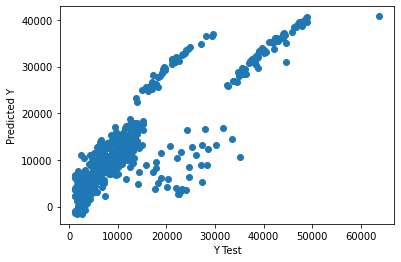

In [25]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')